In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam


In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.
x_test  = x_test.reshape(-1, 28*28).astype("float32") / 255.

In [43]:
input_img = Input(shape=(784,))

encoded = Dense(64, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')


In [5]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                )

In [6]:
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 1s 3ms/step


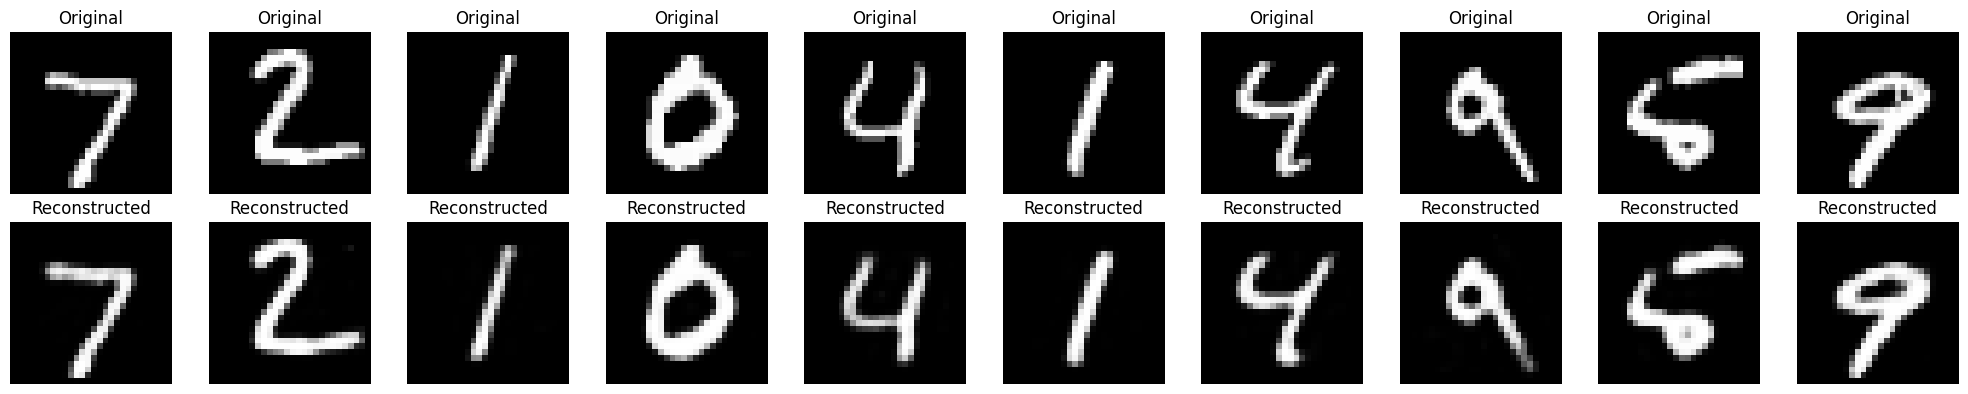

In [7]:
n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [54]:
import numpy as np
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

In [56]:
(x_train,_),(x_test,_)= mnist.load_data()
x_train = x_train.astype("float32")/255.
x_test = x_test.astype("float32")/255.

x_train = x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))

In [67]:
input_img = Input(shape=(784,))
 
encoded = Dense(64, activation='relu')(input_img)
decoded = Dense(784,activation = 'sigmoid')(encoded)
autoencoder = Model(input_img,decoded)
autoencoder.compile(loss="binary_crossentropy",optimizer= Adam(learning_rate =0.001))

In [72]:
autoencoder.fit(
    x_train,x_train,
    validation_data=(x_test,x_test),
    epochs = 5
)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1366 - val_loss: 0.0906
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0834 - val_loss: 0.0778
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0771 - val_loss: 0.0753
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0754 - val_loss: 0.0742
Epoch 5/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0747 - val_loss: 0.0738
